## Theory

The measurement of the precipitate volume fraction is based on the assumption of a two-phase model for the microstructure, namely two phases each of constant composition, separated by an abrupt interface. 

In this two phase model, the volume fraction $\large f_v$ is calculated from the so-called invariant or integrated intensity:

$$ \large Q_o = 2\pi^2(\Delta \rho)^2f_v(1-f_v) $$

where $\large \Delta \rho$ is the difference in the density of scattering factors between the precipitate and the matrix:

$$ \large \Delta \rho = \sum_{i}\frac {f_iX_p^i}{\Omega_p} - \sum_{i}\frac {f_iX_m^i}{\Omega_m} $$

where $\large X_p^i$ and $\large X_m^i$ are the individual atomic fraction of each species $\large i$ in precipitate and matrix, and $\Omega$ is the average atomic volume of precipitate and matrix.

Assumtions:
 - Only $ Cr_{23}C_6$ precipitates formes in the weld
 - The precipitates have an FCC structure with a lattice constant that is nearly three times that of the matrix

Atomic volume is the fraction of cell volume to the number of atoms per cell:

$$ \large \Omega = \frac{V_{cell}}{N_{cell}}  = \frac{a^3}{N_{cell}} $$


 - $N_p$ = number of atoms in $Cr_{23}C_6$ cell = 116
 - $N_m$ = number of atoms in FCC cell = 4


## SAXS profiles

Import file with integrated intensity $Q_0$ across the fusion line recorded at different beam energy (from E1 to E6). Compare the samples after post-weld heat treatment and aging:
 - E3 : 610°C, 16h
 - A4 : 450°C, 5000 h

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_e3 = pd.read_csv ('E3_zone_1_Q_SAXS.csv')
df_a4 = pd.read_csv ('A4_zone_61_Q_SAXS_df2.csv')
df_e3.head()

,y,Cr,E1,E2,E3,E4,E5,E6
0,-150,0.003327,0.001435,0.001268,0.001602,0.001586,0.001250,0.000944
1,-140,0.003373,0.001252,0.001167,0.001304,0.001188,0.001126,0.001432
2,-130,0.003625,0.001479,0.001417,0.001538,0.001412,0.001363,0.001242
3,-120,0.003764,0.001258,0.001256,0.001233,0.001019,0.001229,0.001304
4,-110,0.003579,0.001274,0.001171,0.001202,0.001196,0.001200,0.000955


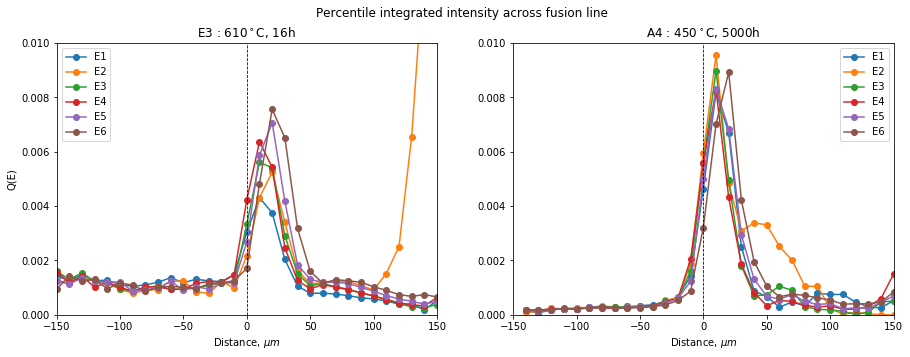

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))
ax = axs[0]
ax.plot(df_e3['y'], df_e3['E1'],\
        df_e3['y'], df_e3['E2'],\
        df_e3['y'], df_e3['E3'],\
        df_e3['y'], df_e3['E4'],\
        df_e3['y'], df_e3['E5'],\
        df_e3['y'], df_e3['E6'], marker = 'o')
ax.set_title('E3 : 610$^\circ$C, 16h')
ax.legend(['E1', 'E2', 'E3', 'E4', 'E5', 'E6']);
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Q(E)')
ax.set_xlim([-150, 150])
ax.set_ylim([0, 0.01])
ax.axvline(x=0.0, linestyle='--', color = 'k', linewidth = 0.8)


ax = axs[1]
ax.plot(df_a4['y'], df_a4['E1'],\
        df_a4['y'], df_a4['E2'],\
        df_a4['y'], df_a4['E3'],\
        df_a4['y'], df_a4['E4'],\
        df_a4['y'], df_a4['E5'],\
        df_a4['y'], df_a4['E6'], marker = 'o')
ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.legend(['E1', 'E2', 'E3', 'E4', 'E5', 'E6']);
ax.set_xlabel('Distance, $\mu m$')
ax.set_xlim([-150, 150])
ax.set_ylim([0, 0.01])
#ax.set_ylabel('Q(E)')
ax.axvline(x=0.0, linestyle='--', color = 'k', linewidth = 0.8)

fig.suptitle('Percentile integrated intensity across fusion line')

plt.show()

Peak value of integrated intensity is higher in the sample after aging. We expect that the higher intensity points to a higher precipitate volume fraction. The position of a fusion line is determined from Cr profiles. Distance = 0 is placed at the point where Cr concentration start to increase. 

A semi-quantitative evaluation of the fraction of precipitate showed a maximum amount of carbides within 10 to 20 µm past the interface. This result is consistent with the carbon content profiles recorded using EPMA at the exact same locations showing peak contents also between 10 and 20 µm from the fusion line.

In [4]:
df_e3_epma = pd.read_csv('E3_interf2_epma.csv')
df_a4_epma = pd.read_csv('A4_zone_61_epma.csv')

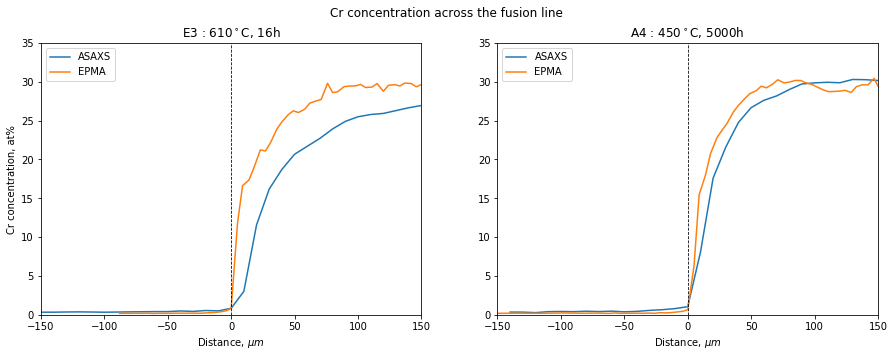

Concentration of Cr in E3 fusion line: 0.8241
Concentration of Cr in A4 fusion line: 0.649


In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))
ax = axs[0]
ax.plot(df_e3['y'], df_e3['Cr']*100)
ax.plot(df_e3_epma['FL'], df_e3_epma['Cr_at'])
ax.set_title('E3 : 610$^\circ$C, 16h')
ax.legend(['ASAXS', 'EPMA'], loc = 'upper left')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Cr concentration, at%')
ax.set_xlim([-150, 150])
ax.set_ylim([0, 35])
ax.axvline(x=0.0, linestyle='--', color = 'k', linewidth = 0.8)


ax = axs[1]
ax.plot(df_a4['y'], df_a4['Cr']*100)
ax.plot(df_a4_epma['FL'], df_a4_epma['Cr_at'])
ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.legend(['ASAXS', 'EPMA'])
ax.set_xlabel('Distance, $\mu m$')
ax.set_xlim([-150, 150])
ax.set_ylim([0, 35])
ax.axvline(x=0.0, linestyle='--', color = 'k', linewidth = 0.8)

fig.suptitle('Cr concentration across the fusion line')

plt.show()
print 'Concentration of Cr in E3 fusion line:', df_e3_epma[df_e3_epma['FL'] == 0]['Cr_at'].values[0]
print 'Concentration of Cr in A4 fusion line:', df_a4_epma[df_a4_epma['FL'] == 0]['Cr_at'].values[0] 

Cr-content profiles could be calculated based on the transmission values at the different energies as shown on Figure 1. The resulting profiles are in good agreement with the EPMA profiles that had been recorded at the same locations prior to the ASAXS experiment. ASAXS did tend to smooth the profile but this was expected given the much larger probe size compared to EPMA (Ø ≈ 2 µm)

## EPMA profiles

To evaluate the volume fraction of precipitate the integrated intensity $\large Q_o$ is divided to square of electronic contrast $ \large \Delta\rho^2$. The contrast is a function of:
- matrix concentration = var (EPMA profiles of Fe, Ni, Cr, Mn and C)
- precipitate concentration = cnst ($Cr_{23} C_6$ : 0.79 Cr and 0.21 C)
- atomic volume of matrix  = var 
- atomic volume of precipitates = cnst

In [6]:
df_e3_fit = pd.read_csv('E3_int2_at_fit.csv')
df_a4_fit = pd.read_csv('A4_61_at_fit.csv')
df_a4_fit.head(6)

,Distance,Cr_at,Fe_at,Ni_at,Mn_at,C_at
0,0,0.353424,95.692571,0.981128,1.684342,0.519440
1,10,15.340133,53.910331,27.873961,0.735373,0.802974
2,20,20.799440,38.736860,36.403241,0.687093,1.063104
3,30,24.620181,28.940612,42.420847,0.646354,0.956667
4,40,26.996882,23.493999,46.237700,0.612490,0.787049
5,50,28.310944,20.886176,48.414183,0.584758,0.589759


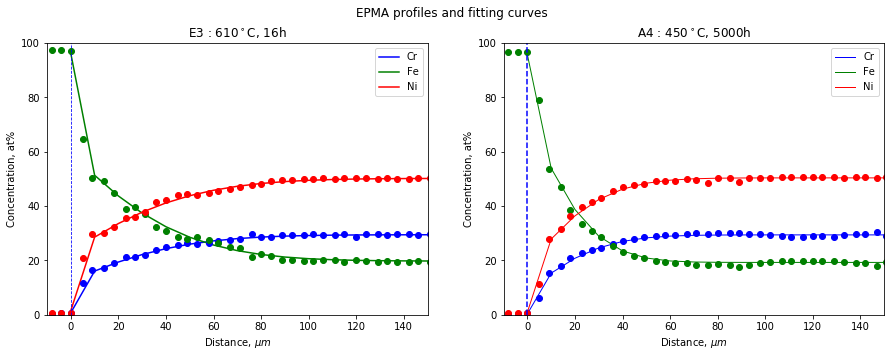

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))


df=df_e3_fit
ax = axs[0]
ax.plot(df['Distance'], df['Cr_at'],
       df['Distance'], df['Fe_at'],
       df['Distance'], df['Ni_at'],linewidth = 1.5)

ax.plot(df_e3_epma['FL'], df_e3_epma['Cr_at'], 'o',
       df_e3_epma['FL'], df_e3_epma['Fe_at'], 'o',
       df_e3_epma['FL'], df_e3_epma['Ni_at'], 'o')

ax.set_title('E3 : 610$^\circ$C, 16h')

ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Concentration, at%')
ax.set_xlim([-10, 150])
ax.set_ylim([0, 100])
ax.axvline(x=0.0, linestyle='--', color = 'k', linewidth =0.8)
colors = ['blue', 'green', 'red','blue', 'green', 'red','blue', 'green', 'red','blue', 'green', 'red']
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
    
ax.legend(['Cr', 'Fe','Ni'], loc = 'upper right')

df=df_a4_fit
ax = axs[1]
ax.plot(df['Distance'], df['Cr_at'],
       df['Distance'], df['Fe_at'],
       df['Distance'], df['Ni_at'],linewidth = 1)

ax.plot(df_a4_epma['FL'], df_a4_epma['Cr_at'], 'o',
       df_a4_epma['FL'], df_a4_epma['Fe_at'],'o',
       df_a4_epma['FL'], df_a4_epma['Ni_at'], 'o')

ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Concentration, at%')
ax.set_xlim([-10, 150])
ax.set_ylim([0, 100])
ax.axvline(x=0.0, linestyle='--', color = 'k', linewidth = 1.5)

colors = ['blue', 'green', 'red','blue', 'green', 'red','blue', 'green', 'red','blue', 'green', 'red']
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

ax.legend(['Cr', 'Fe','Ni'], loc = 'upper right')

fig.suptitle('EPMA profiles and fitting curves')

plt.show()

## Precipitate atomic volume

Table 1. Lattice parameters

In [8]:
from IPython.display import display
df = pd.read_csv('Atomic volume of precipitates.csv')
display(df[:10].fillna(''))

,Precipitate,Method,a,Material,Link
0,Cr23C6,Experiment,10.650,monocrystal,https://doi.org/10.1107/S0567740872007526
1,,,10.660,monocrystal,https://doi.org/10.1107/S0108768187097957
2,,,10.631,IN740H,https://mountainscholar.org/bitstream/handle/1...
3,,,10.636,IN740,
4,,Calculated,10.531,monocrystal,https://doi.org/10.1016/j.actamat.2015.08.078
5,,,10.390,monocrystal,
6,,,10.903,monocrystal,https://doi.org/10.1016/j.actamat.2005.07.039
7,Fe23C6,Experiment,10.639,BCC-Fe nanocomposit,https://doi.org/10.1088/0957-4484/14/11/010
8,,Calculated,10.160,monocrystal,
9,,Calculated,10.467,monocrystal,https://doi.org/10.1016/j.actamat.2015.08.078


Experimental value of $M_{23}C_6$ precipitate varies from 10.64 to 10.66 Å depending on the precipitate composition. The lattice parameter of precipitates in Inconel 740 is slightly lower than in $Cr_{23}C_6$ monocrystal and equal to 10.63 Å.

## Matrix atomic volume

Atomic volume of matrix depends on its composition, which significantly varies across the weld. Especially, first 10 µm after the fusion line: Fe (99-->55 at%), Cr (0.2-->18 at%), Ni (0.8-->30 at%). Another problem is that ASAXS measurement right after the fusion line may include BCC part, because of uncertainties in beam positioning (beam size in the analysis direction is ~10 µm). Thus, an accurate result interpretation and calculation of precipitate fraction is possible starting from 10 µm, where we have SAXS intesity only from FCC and small matrix composition gradiend( var < 9%).

According to [A.J. Bradley, The lattice spacing of iron-nickel alloys](https://doi.org/10.1080/14786443708561826), the lattice spacing rises steadily from a value of 3.5168 Å for pure nickel to a maximum of 3.5878 Å recorded at 38.0 at% of nickel. It then falls to 3.5741 Å at the end of the face-centred cubic phase.

In [9]:
df = pd.read_csv('Fe_Ni_lattice_dataset.csv')

In [10]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [11]:
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [go.Scatter(x=df['Ni content, at%'], y=df['lattice parameter'], mode = 'lines+markers')],
    "layout": go.Layout(
                title='The Lattice Spacing Measurements for slowly cooled Iron-Nickel Alloys',
                xaxis=dict(
                    title='Ni content, at%',
                    titlefont=dict(
                        family='Courier New, monospace',
                        size=18,
                        color='k'
                    )
                ),
                yaxis=dict(
                    title='lattice spacing, Å',
                    titlefont=dict(
                        family='Courier New, monospace',
                        size=18,
                        color='k'
                    )
                )
    )
        
})

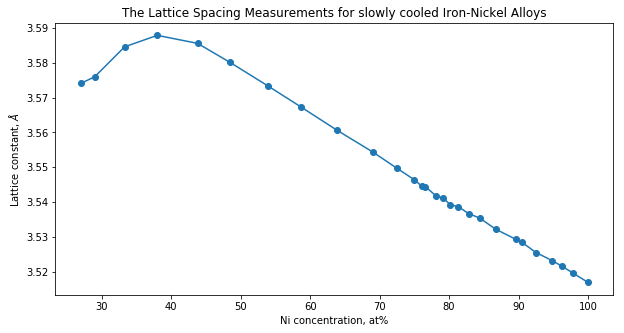

In [12]:
fig = plt.figure(figsize=(10,5))
plt.plot(df['Ni content, at%'],df['lattice parameter'], marker = 'o')
plt.title('The Lattice Spacing Measurements for slowly cooled Iron-Nickel Alloys')
plt.xlabel('Ni concentration, at%')
plt.ylabel('Lattice constant, $\AA$')

plt.show()

Effect of Cr content on the crystal structure of Fe–xCr–11Ni–0.5N (x = 15–29 wt.%) austenitic alloys was studied by [A. Beskrovni](https://www.sciencedirect.com/science/article/abs/pii/S0925838899002650)

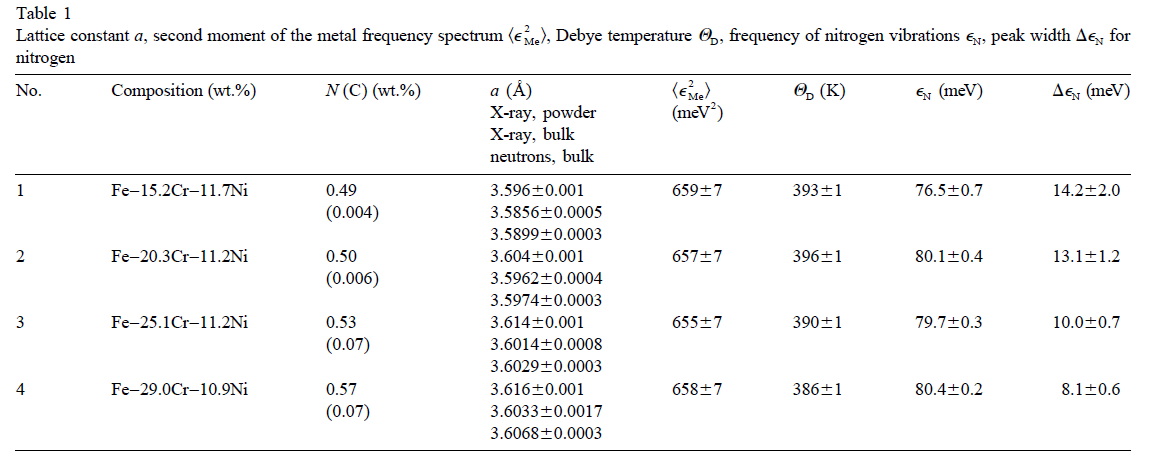

In [13]:
from IPython.display import Image
Image('Capture Fe_Cr_Ni lattice parameters.png', width=700)

Authors found the lattice dilatation with increasing Cr content. A linear fit of data gives $ a(Å) = 3.5704+0.0013X_{Cr}$(wt%) for bulk

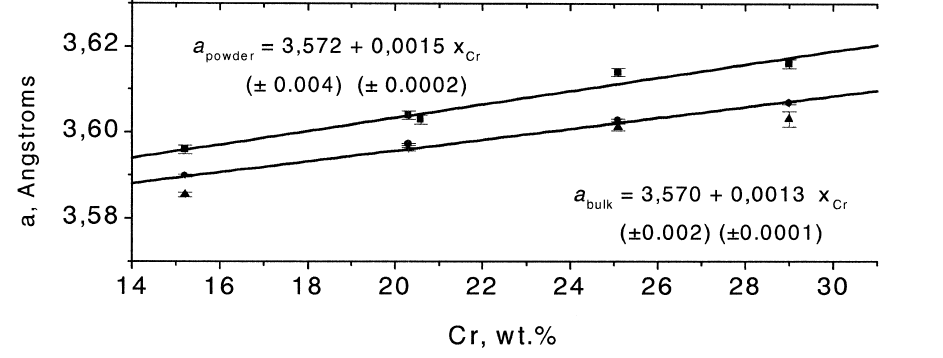

In [14]:
Image('Fe_Cr_Ni lattice parameters vs Cr.png', width=500)

Calculate the lattice parameter of the weld as a function of Ni and Cr content. First, find an approximation function for Fe-Ni graph.

In [15]:
df.head()

,"Ni content, at%",lattice parameter
0,27.0,3.5741
1,29.0,3.5760
2,33.3,3.5846
3,38.0,3.5879
4,43.8,3.5856


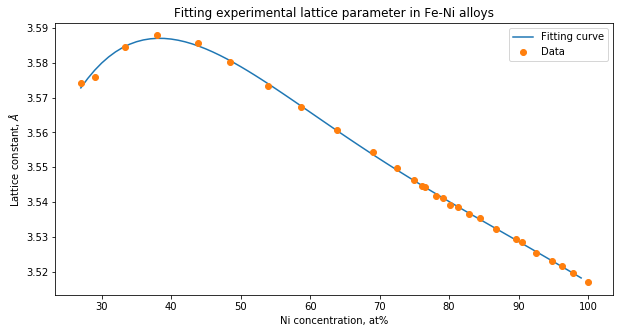

In [16]:
import numpy as np
import numpy.polynomial.polynomial as poly

coefs = poly.polyfit(df['Ni content, at%'], df['lattice parameter'], 5)

Ni_range = np.arange(27,100,1)
ffit = poly.polyval(Ni_range,coefs)
df_lattice_FeNi = pd.DataFrame(ffit, Ni_range).reset_index()
df_lattice_FeNi.columns = ['Ni_at','lattice parameter_FeNi']

fig = plt.figure(figsize=(10,5))
plt.plot(Ni_range, ffit)
plt.plot(df['Ni content, at%'], df['lattice parameter'], 'o')
plt.title('Fitting experimental lattice parameter in Fe-Ni alloys')
plt.legend(['Fitting curve', 'Data'], loc = 'upper right')
plt.xlabel('Ni concentration, at%')
plt.ylabel('Lattice constant, $\AA$')

plt.show()

In [17]:
def get_df_name(df):
        name =[x for x in globals() if globals()[x] is df][0]
        return name

In [18]:
def lattice_cnst_FeCrNi(df):
    
    df_name = get_df_name(df)
    df = df.astype(int)
    
    df_merged = pd.merge(df, df_lattice_FeNi, on='Ni_at', how = 'left')
    df_merged['lattice parameter_FeNiCr'] = df_merged['lattice parameter_FeNi'] + 0.0013*df_merged['Cr_at']
    df_merged[['Cr_at','Fe_at','Ni_at','Mn_at','C_at']] = df_merged[['Cr_at','Fe_at','Ni_at','Mn_at','C_at']]/100

    return (df_merged)

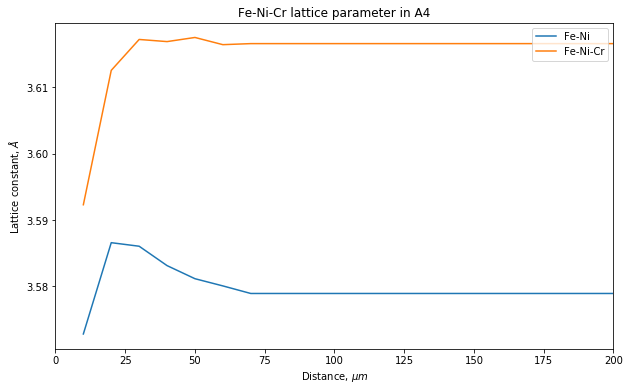

In [19]:
#plot the lattice parameter across the weld in the specified sample
df_merged = lattice_cnst_FeCrNi(df_a4_fit)
fig = plt.figure(figsize=(10,6))
plt.plot(df_merged['Distance'], df_merged['lattice parameter_FeNi'])
plt.plot(df_merged['Distance'], df_merged['lattice parameter_FeNiCr'])
plt.title('Fe-Ni-Cr lattice parameter in A4')
plt.legend(['Fe-Ni', 'Fe-Ni-Cr'], loc = 'upper right')
plt.xlabel('Distance, $\mu m$')
plt.ylabel('Lattice constant, $\AA$')
plt.xlim([0, 200])

plt.show()

## Electron contrast

As mentioned above an electronic contrast $\large \Delta \rho$ is calculated as:

$$ \large \Delta \rho = \sum_{i}\frac {f_iX_p^i}{\Omega_p} - \sum_{i}\frac {f_iX_m^i}{\Omega_m} $$

In [20]:
def el_contrast(df, a_precip):
    #start from 10µm
    df = df[1:]
    #summarize concentrations multiplied by atomic number
    sum_matrix = (df['C_at']*12 + df['Cr_at']*24 + df['Fe_at']*26 + df['Mn_at']*25 + df['Ni_at']*28)
    sum_precip = (0.21*12 + 0.79*24)
    #atomic volume (Å^3)
    at_volume_matrix = df['lattice parameter_FeNiCr']**3/4
    at_volume_precip = (a_precip**3)/116
    
    dens_matrix = sum_matrix/at_volume_matrix
    dens_precip = sum_precip/at_volume_precip
    contrast = dens_precip-dens_matrix
    
    distance = np.arange(10, 410, 10)
    df_contrast = pd.DataFrame(contrast).reset_index()
    df_contrast.columns = ['y','el_contrast_'+ str(a_precip)]
    df_contrast['y'] = distance
    return df_contrast

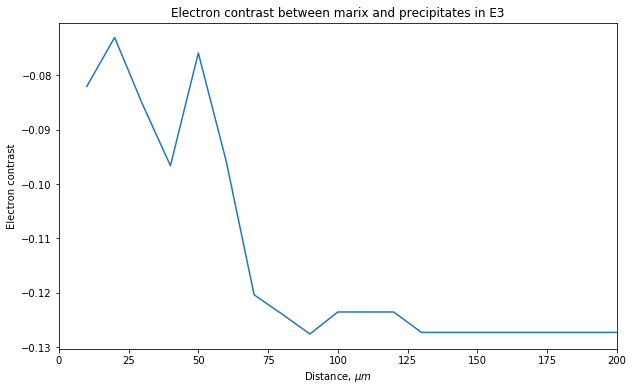

In [21]:
df_fit = pd.read_csv('E3_int2_at_fit.csv')

df_merged = lattice_cnst_FeCrNi(df_fit)
df_contrast = el_contrast(df_merged, 10.65)
fig = plt.figure(figsize=(10,6))
plt.plot(df_contrast['y'], df_contrast['el_contrast_10.65'])
plt.title('Electron contrast between marix and precipitates in E3')
plt.xlabel('Distance, $\mu m$')
plt.ylabel('Electron contrast')
plt.xlim([0, 200])

plt.show()

## Precipitate volume fraction

To evaluate the volume fraction of precipitate the integrated intensity $\large Q_o$ is divided to $ \large 2\pi\Delta\rho^2$.

In [22]:
def volume_fraction(df_epma_fit, df_saxs):
    
    dfm = lattice_cnst_FeCrNi(df_epma_fit)
    
    dfc = el_contrast(dfm, 10.63)
    df_saxs = pd.merge(df_saxs, dfc, on='y', how = 'left')
    
    dfc = el_contrast(dfm, 10.71)
    df_saxs = pd.merge(df_saxs, dfc, on='y', how = 'left')
    
    df_saxs['E_mean'] = df_saxs[['E1','E2','E3','E4','E5','E6']].mean(axis = 1)
    df_saxs['E_std'] = df_saxs[['E1','E2','E3','E4','E5','E6']].std(axis = 1)
    df_saxs['fv_10.63'] = df_saxs['E_mean']*100/df_saxs['el_contrast_10.63']**2/2/3.1415
    df_saxs['fv_10.71'] = df_saxs['E_mean']*100/df_saxs['el_contrast_10.71']**2/2/3.1415
    df_saxs['fv_mean'] = (df_saxs['fv_10.63']+df_saxs['fv_10.71'])/2
    
    df_saxs['fv_10.63_std'] = df_saxs['E_std']*100/df_saxs['el_contrast_10.63']**2/2/3.1415
    df_saxs['fv_10.71_std'] = df_saxs['E_std']*100/df_saxs['el_contrast_10.71']**2/2/3.1415
    df_saxs['fv_mean_std'] =  df_saxs['fv_10.71_std']/(2**0.5) 
    return df_saxs

In [23]:
#import file apply volume_fraction function
df_e3_fit = pd.read_csv('E3_int2_at_fit.csv')
df_e3_saxs = pd.read_csv('E3_zone_1_Q_SAXS.csv')
df_e3_saxs = volume_fraction(df_e3_fit, df_e3_saxs)

df_a4_fit = pd.read_csv('A4_61_at_fit.csv')
df_a4_saxs = pd.read_csv('A4_zone_61_Q_SAXS_df2.csv')
df_a4_saxs = volume_fraction(df_a4_fit, df_a4_saxs)

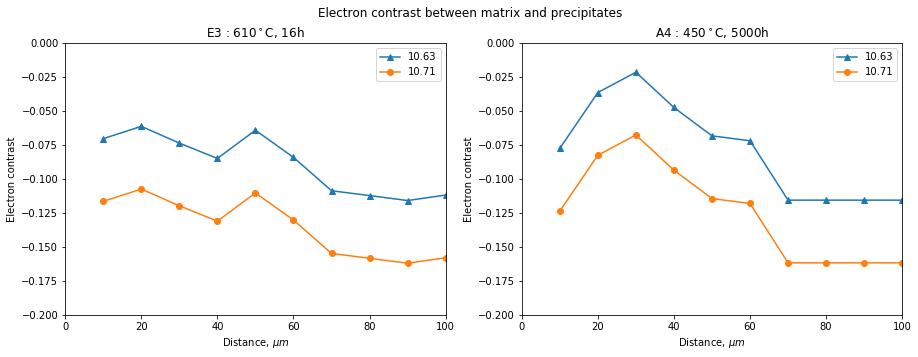

In [24]:
#plot electronic contrast
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))

ax = axs[0]
ax.plot(df_e3_saxs['y'],df_e3_saxs['el_contrast_10.63'], '-^')
ax.plot(df_e3_saxs['y'],df_e3_saxs['el_contrast_10.71'], '-o')
ax.set_title('E3 : 610$^\circ$C, 16h')
ax.legend(['10.63', '10.71'], loc = 'upper right')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Electron contrast');
ax.set_xlim([0, 100])
ax.set_ylim([-0.2, 0]);


ax = axs[1]
ax.plot(df_a4_saxs['y'],df_a4_saxs['el_contrast_10.63'], '-^')
ax.plot(df_a4_saxs['y'],df_a4_saxs['el_contrast_10.71'], '-o')
ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.legend(['10.63', '10.71'], loc = 'upper right')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Electron contrast');
ax.set_xlim([0, 100])
ax.set_ylim([-0.2, 0]);

fig.suptitle('Electron contrast between matrix and precipitates')

plt.show()

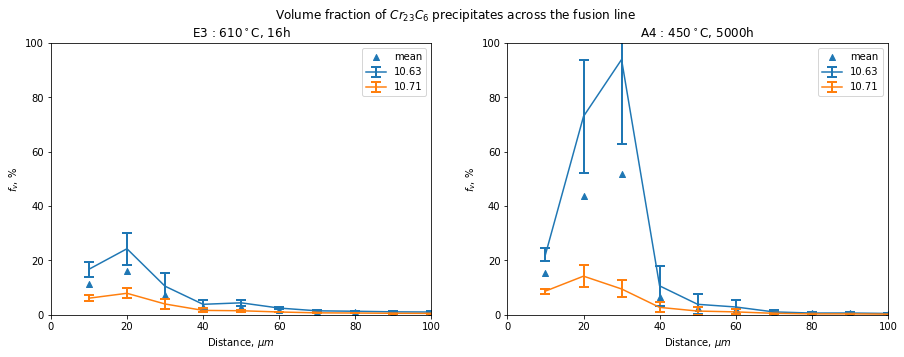

In [25]:
#plot precipipate volume_fraction
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))

ax = axs[0]
ax.scatter(df_e3_saxs['y'],df_e3_saxs['fv_mean'], marker='^')

ax.errorbar(df_e3_saxs['y'],df_e3_saxs['fv_10.63'], df_e3_saxs['fv_10.63_std'], capsize=5, 
    elinewidth=2, markeredgewidth=2)
ax.errorbar(df_e3_saxs['y'],df_e3_saxs['fv_10.71'], df_e3_saxs['fv_10.71_std'], capsize=5, 
    elinewidth=2, markeredgewidth=2)
ax.set_title('E3 : 610$^\circ$C, 16h')
ax.legend(['mean', '10.63', '10.71'], loc = 'upper right')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('$f_v$, %');
ax.set_xlim([0, 100])
ax.set_ylim([0, 100]);


ax = axs[1]
ax.scatter(df_a4_saxs['y'],df_a4_saxs['fv_mean'], marker='^')

ax.errorbar(df_a4_saxs['y'],df_a4_saxs['fv_10.63'], df_a4_saxs['fv_10.63_std'], capsize=5, 
    elinewidth=2, markeredgewidth=2)
ax.errorbar(df_a4_saxs['y'],df_a4_saxs['fv_10.71'], df_a4_saxs['fv_10.71_std'], capsize=5, 
    elinewidth=2, markeredgewidth=2)
ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.legend(['mean', '10.63', '10.71'], loc = 'upper right')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('$f_v$, %');
ax.set_xlim([0, 100])
ax.set_ylim([0, 100]);

fig.suptitle('Volume fraction of $Cr_{23}C_6$ precipitates across the fusion line')

plt.show()

In [26]:
def plot_fv(df):
    fig = plt.figure(figsize=(10,6))
    plt.scatter(df['y'],df['fv_mean'], marker='^')
    plt.errorbar(df['y'],df['fv_10.63'], df['fv_10.63_std'], capsize=5, 
        elinewidth=2, markeredgewidth=2)
    plt.errorbar(df['y'],df['fv_10.66'], df['fv_10.66_std'], capsize=5, 
        elinewidth=2, markeredgewidth=2)
    plt.title('Volume fraction of precipitate in ')
    plt.legend(['mean', '10.63', '10.66'], loc = 'upper right')
    plt.xlabel('Distance, $\mu m$')
    plt.ylabel('$f_v$, %');
    plt.xlim([0, 100])
    plt.ylim([-0.15, 0]);

## If the lattice constant of m23c6 is 3 times of a matrix..

In [27]:
def lattice_cnst_FeCrNi_new(df):
    
    df_name = get_df_name(df)
    df = df.astype(int)
    
    df_merged = pd.merge(df, df_lattice_FeNi, on='Ni_at', how = 'left')
    df_merged['lattice parameter_FeNiCr'] = df_merged['lattice parameter_FeNi'] + 0.0013*df_merged['Cr_at']
    df_merged[['Cr_at','Fe_at','Ni_at','Mn_at','C_at']] = df_merged[['Cr_at','Fe_at','Ni_at','Mn_at','C_at']]/100
    df_merged['lattice parameter_m23c6'] = df_merged['lattice parameter_FeNiCr'] * 3

    return (df_merged)

In [28]:
def el_contrast_new(df):
    #start from 10µm
    df = df[1:]
    #summarize concentrations multiplied by atomic number
    sum_matrix = (df['C_at']*12 + df['Cr_at']*24 + df['Fe_at']*26 + df['Mn_at']*25 + df['Ni_at']*28)
    sum_precip = (0.21*12 + 0.79*24)
    #atomic volume (Å^3)
    at_volume_matrix = df['lattice parameter_FeNiCr']**3/4
    at_volume_precip = df['lattice parameter_m23c6']**3/116
    
    dens_matrix = sum_matrix/at_volume_matrix
    dens_precip = sum_precip/at_volume_precip
    contrast = dens_precip-dens_matrix
    
    distance = np.arange(10, 410, 10)
    df_contrast = pd.DataFrame(contrast).reset_index()
    df_contrast.columns = ['y','el_contrast']
    df_contrast['y'] = distance
    return df_contrast

In [29]:
def volume_fraction_new(df_epma_fit, df_saxs):
    
    dfm = lattice_cnst_FeCrNi_new(df_epma_fit)
    
    dfc = el_contrast_new(dfm)
    df_saxs = pd.merge(df_saxs, dfc, on='y', how = 'left')

    df_saxs['E_mean'] = df_saxs[['E1','E2','E3','E4','E5','E6']].mean(axis = 1)
    df_saxs['E_std'] = df_saxs[['E1','E2','E3','E4','E5','E6']].std(axis = 1)
    df_saxs['fv_mean'] = df_saxs['E_mean']*100/df_saxs['el_contrast']**2/2/3.1415

    df_saxs['fv_std'] = df_saxs['E_std']*100/df_saxs['el_contrast']**2/2/3.1415
    return df_saxs

In [30]:
#import file apply volume_fraction function
df_e3_fit = pd.read_csv('E3_int2_at_fit.csv')
df_e3_saxs = pd.read_csv('E3_zone_1_Q_SAXS.csv')
df_e3_saxs_2 = volume_fraction_new(df_e3_fit, df_e3_saxs)

df_a4_fit = pd.read_csv('A4_61_at_fit.csv')
df_a4_saxs = pd.read_csv('A4_zone_61_Q_SAXS_df2.csv')
df_a4_saxs_2 = volume_fraction_new(df_a4_fit, df_a4_saxs)

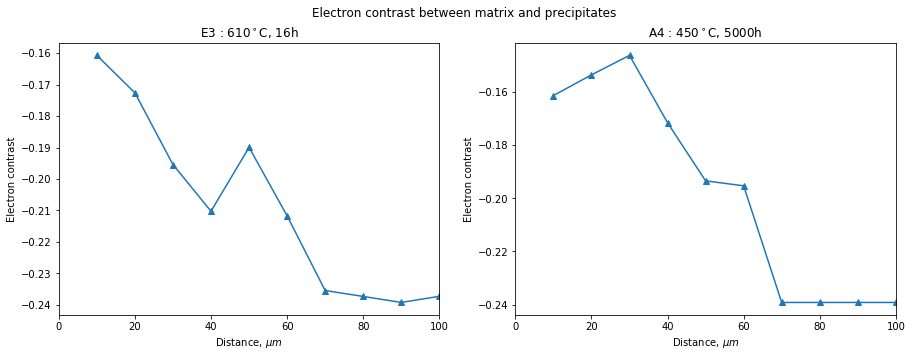

In [31]:
#plot electronic contrast
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))

ax = axs[0]
ax.plot(df_e3_saxs_2['y'],df_e3_saxs_2['el_contrast'], '-^')
ax.set_title('E3 : 610$^\circ$C, 16h')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Electron contrast');
ax.set_xlim([0, 100])
#ax.set_ylim([-0.2, 0]);


ax = axs[1]
ax.plot(df_a4_saxs_2['y'],df_a4_saxs_2['el_contrast'], '-^')
ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('Electron contrast');
ax.set_xlim([0, 100])
#ax.set_ylim([-0.2, 0]);

fig.suptitle('Electron contrast between matrix and precipitates')

plt.show()

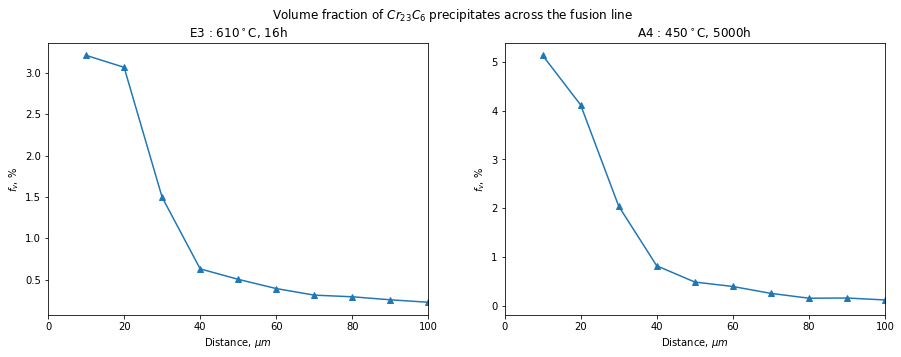

In [32]:
#plot precipipate volume_fraction
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))

ax = axs[0]
ax.plot(df_e3_saxs_2['y'],df_e3_saxs_2['fv_mean'],'-^')
ax.set_title('E3 : 610$^\circ$C, 16h')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('$f_v$, %');
ax.set_xlim([0, 100])
#ax.set_ylim([0, 100]);


ax = axs[1]
ax.plot(df_a4_saxs_2['y'],df_a4_saxs_2['fv_mean'], '-^')
ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('$f_v$, %');
ax.set_xlim([0, 100])
#ax.set_ylim([0, 100]);

fig.suptitle('Volume fraction of $Cr_{23}C_6$ precipitates across the fusion line')

plt.show()

...volume fraction at 20 µm is less than at 10 µm. This is not coincident with carbon peak position. But values are more reasonable.

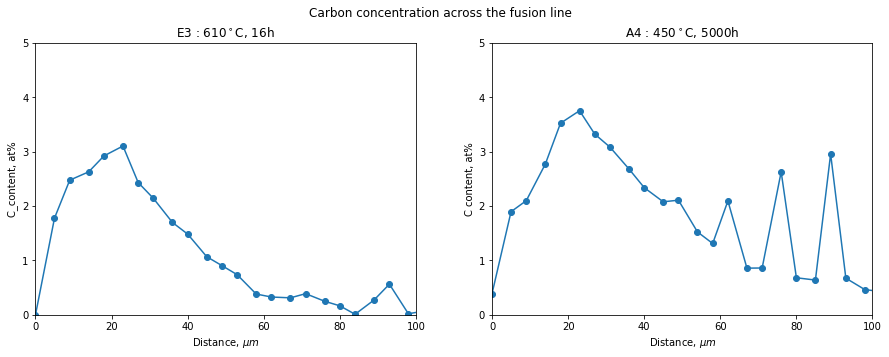

In [33]:
df_e3_epma = pd.read_csv('E3_interf2_epma.csv')
df_a4_epma = pd.read_csv('A4_zone_61_epma.csv')

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(15,5))

ax = axs[0]
ax.plot(df_e3_epma['FL'],df_e3_epma['C_at'],'-o')
ax.set_title('E3 : 610$^\circ$C, 16h')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('C_content, at%');
ax.set_xlim([0, 100])
ax.set_ylim([0, 5]);


ax = axs[1]
ax.plot(df_a4_epma['FL'],df_a4_epma['C_at'], '-o')
ax.set_title('A4 : 450$^\circ$C, 5000h')
ax.set_xlabel('Distance, $\mu m$')
ax.set_ylabel('C content, at%');
ax.set_xlim([0, 100])
ax.set_ylim([0, 5]);

fig.suptitle('Carbon concentration across the fusion line')

plt.show()

### To be continued for other samples...